# Analysing Trends of Gaming Generations
## (Years 1977-2020)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/vgchartz-2024.csv")
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN


In [3]:
title_colours = {
    'Grand Theft Auto V': 'blue',
    'Call of Duty: Black Ops': 'orange',
    'Call of Duty: Modern Warfare 3': 'green',
    'Call of Duty: Black Ops II': 'teal',
    'Call of Duty: Ghosts': 'cyan'
}

genre_colours = {
    'Sports': '#89CFF0',
    'Action': '#FFA07A',
    'Shooter': '#98FB98',
    'Role-Playing': '#FF6F61',
    'Racing': '#9370DB',
    'Fighting': '#FFD700',
    'Misc': '#87CEEB',
    'Platform': '#FFB6C1',
    'Simulation': '#B0E57C',
    'Adventure': '#FF69B4',
    'Puzzle': '#40E0D0',
    'Strategy': '#CD853F',
    'Music': '#696969',
    'Action-Adventure': '#808000'
}

## Cleaning of the dataset

In [4]:
#Removing the "img" & 'last_update' column due to irrelevant data + removing null total_sales
df = df.drop(columns=['img', 'last_update'], errors='ignore')
df = df.dropna(subset=['total_sales', 'release_date'])
df = df[df['total_sales'] != 0.00]

In [5]:
#Converting the 'release_date' column from object to a date/time format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06


In [6]:
#Extracting month from 'release_date' and creating column displaying it
df['month'] = df['release_date'].dt.strftime('%b')
df["month"] = pd.Categorical(df["month"], 
                                     categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 
                                     ordered=True)
df.head(1)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,month
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,Sep


## Statistics of all Console Generations

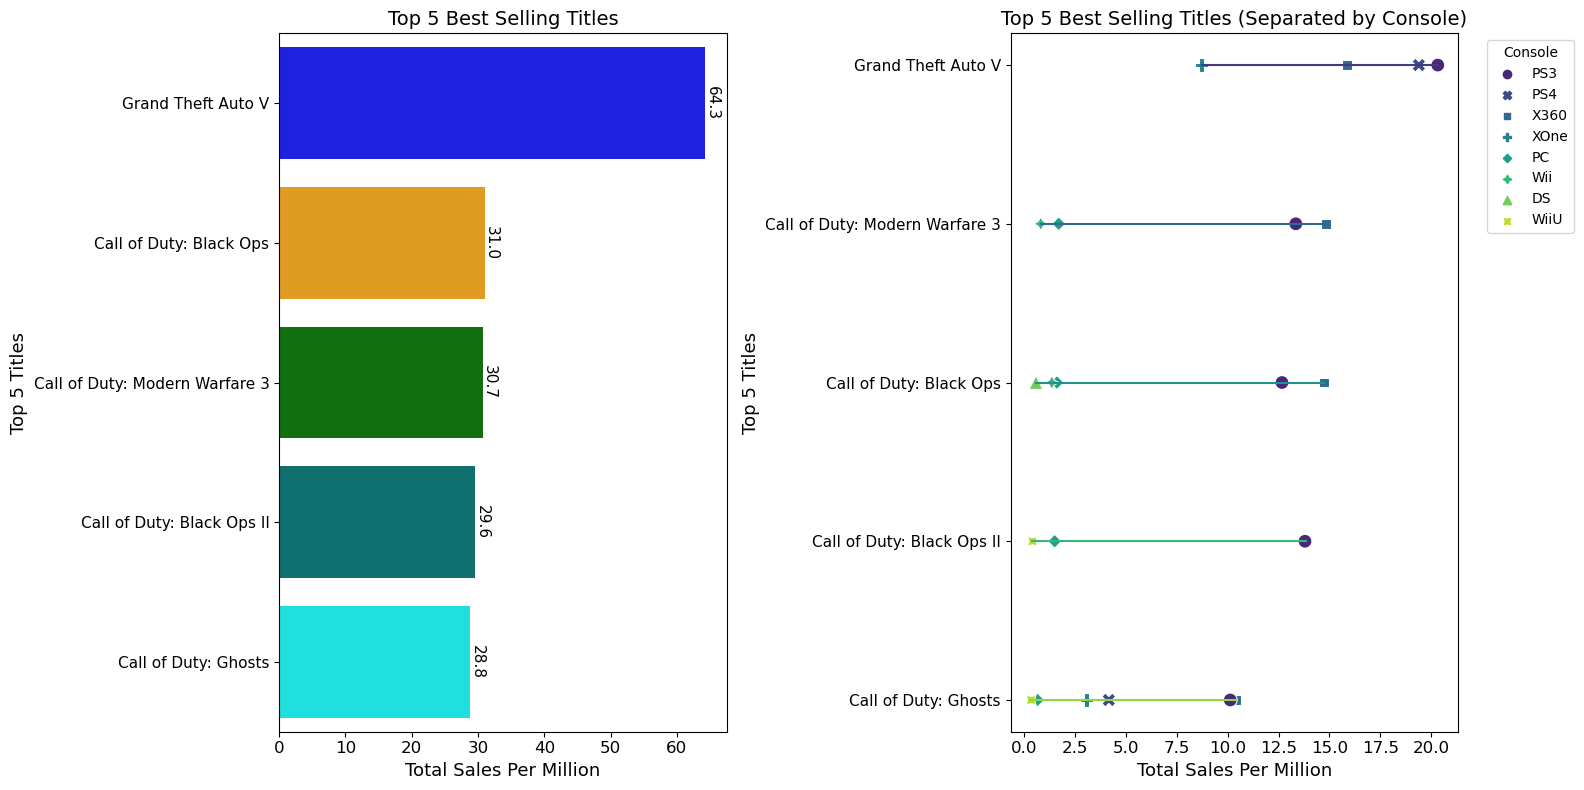

In [68]:
#Creating an aggregate for the titles in 'total_sales' and containing the top 5
total_sales_titles = df.groupby('title')['total_sales'].sum().reset_index()
top_5_total_titles = total_sales_titles.sort_values(by='total_sales', ascending=False).head(5)

#Finding top 5 titles, keeping all console entries
top_5_total_large = df.groupby('title')['total_sales'].sum().nlargest(5).index
top_5_total_data = df[df['title'].isin(top_5_total_large)]

#Creating subplots and displaying graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

ax1 = sns.barplot(x='total_sales', y='title', data=top_5_total_titles, palette=title_colours, ax=axes[0])
axes[0].set_title("Top 5 Best Selling Titles", fontsize=14)
axes[0].set_xlabel("Total Sales Per Million", fontsize=13)
axes[0].set_ylabel("Top 5 Titles", fontsize=13)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_width(), '.1f'), 
                  (bar.get_width(), bar.get_y() + bar.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (5, 0), 
                  textcoords = 'offset points',
                  rotation=-90, fontsize=11)

sns.scatterplot(data=top_5_total_data, x='total_sales', y='title', hue='console', style='console', s=100, palette='viridis', ax=axes[1])
sns.lineplot(data=top_5_total_data, x='total_sales', y='title', hue='title', legend=None, palette='viridis', estimator=None, ax=axes[1])
axes[1].set_title("Top 5 Best Selling Titles (Separated by Console)", fontsize=14)
axes[1].set_xlabel("Total Sales Per Million", fontsize=13)
axes[1].set_ylabel("Top 5 Titles", fontsize=13)
axes[1].legend(title='Console', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.setp(axes[0].get_xticklabels(), fontsize=12)
plt.setp(axes[0].get_yticklabels(), fontsize=11)
plt.setp(axes[1].get_xticklabels(), fontsize=12)
plt.setp(axes[1].get_yticklabels(), fontsize=11)
plt.tight_layout()


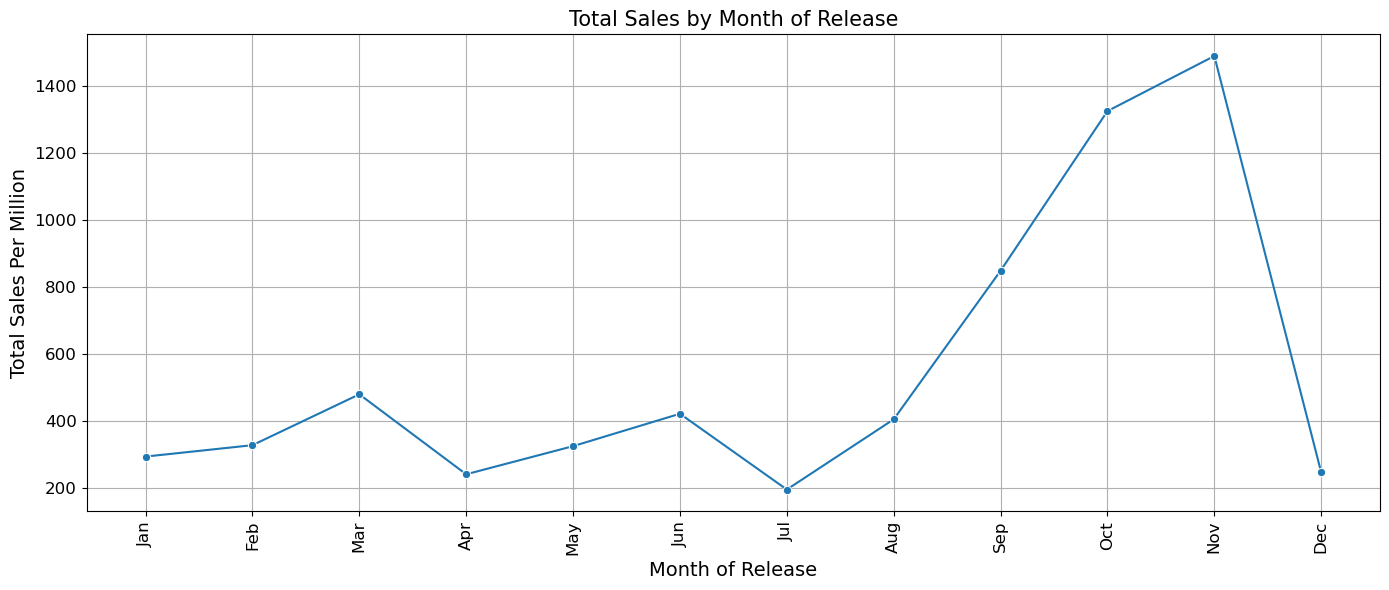

In [84]:
#Creating an aggregate for the months in 'total_sales'
monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()

#Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_sales', marker='o')
plt.title('Total Sales by Month of Release', fontsize=15)
plt.xlabel('Month of Release', fontsize=14)
plt.ylabel('Total Sales Per Million', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

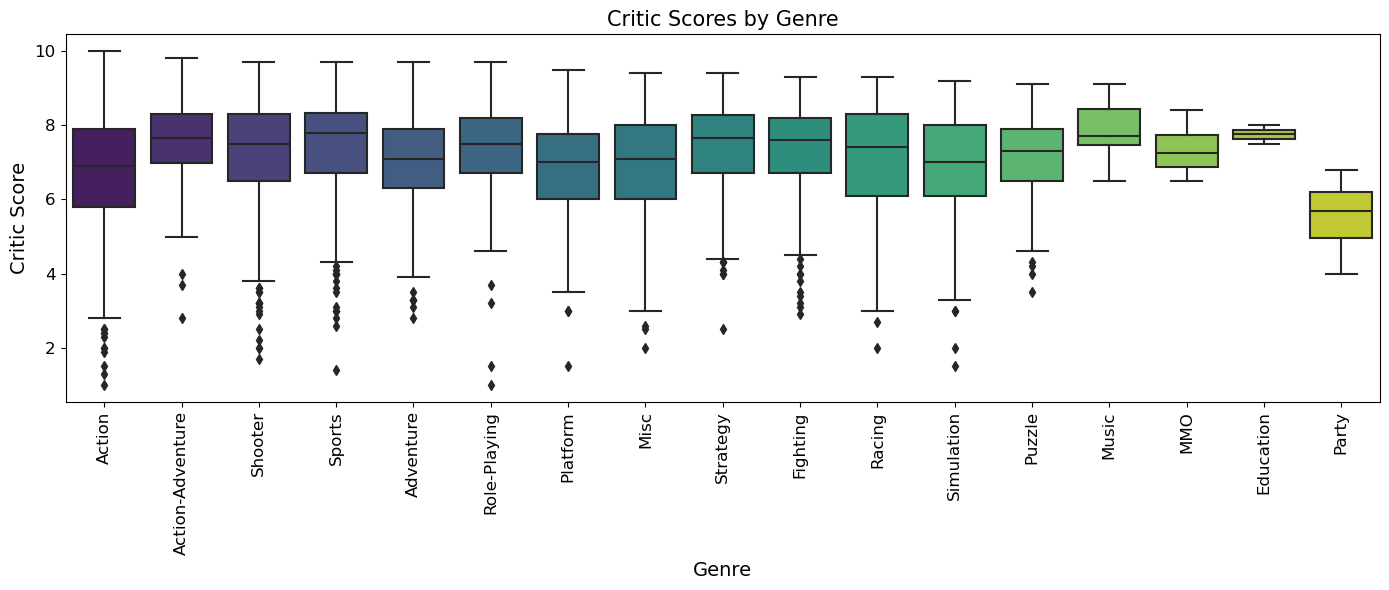

In [80]:
#Removing NaN values and couting entries from 'genre' + 'critic_score' to prepare for box plot
genre_critic = df[['genre', 'critic_score']].dropna()
genre_counts = genre_critic['genre'].value_counts()

#Filter out genres with only one critic score entry
genre_multiple_entry = genre_counts[genre_counts > 1].index
filtered_genre = genre_critic[genre_critic['genre'].isin(genre_multiple_entry)].sort_values(by='critic_score', ascending=False)

#Plotting
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_genre, x='genre', y='critic_score', palette='viridis')
plt.title('Critic Scores by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Critic Score', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

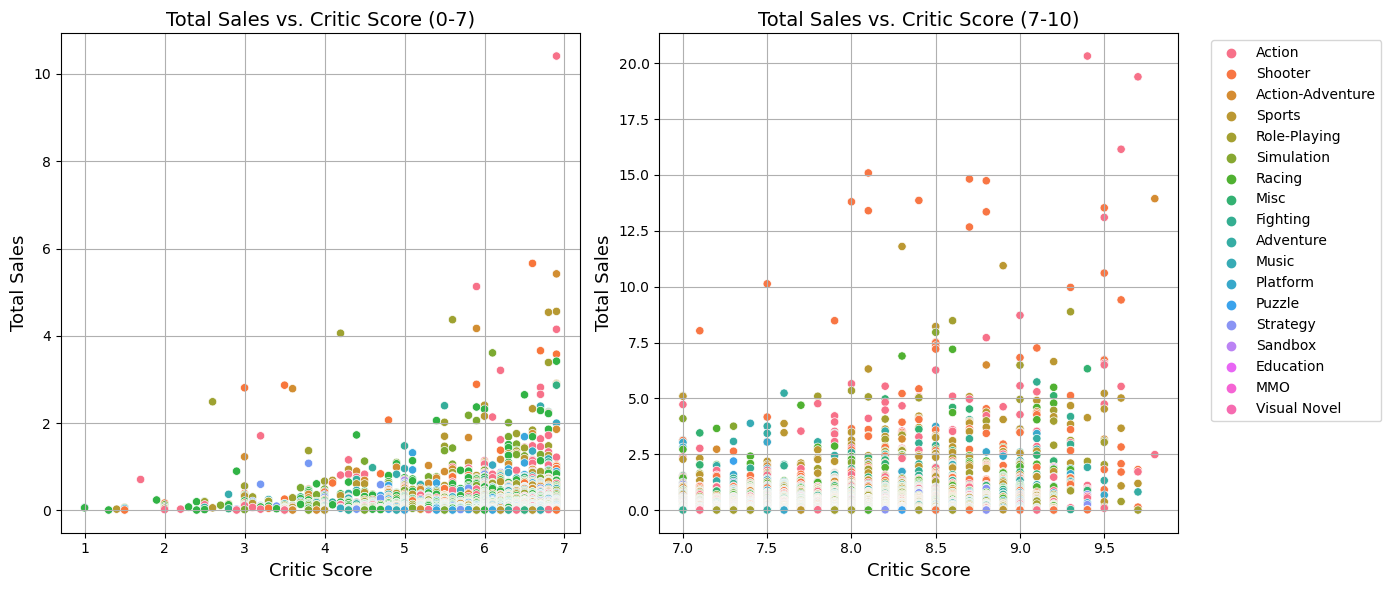

In [10]:
#Variables to define ranges for critic_score
low_score_range = (0, 7)
high_score_range = (7, 10)

#Filtering the dataframe for titles within the low and high critic score ranges
low_score_games = df[(df['critic_score'] >= low_score_range[0]) & (df['critic_score'] < low_score_range[1])]
high_score_games = df[(df['critic_score'] >= high_score_range[0]) & (df['critic_score'] < high_score_range[1])]

#Creating subplots and displaying graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Plotting scatterplot
sns.scatterplot(data=low_score_games, x='critic_score', y='total_sales', hue='genre', ax=axes[0])
axes[0].set_title('Total Sales vs. Critic Score (0-7)', fontsize=14)
axes[0].set_xlabel('Critic Score', fontsize=13)
axes[0].set_ylabel('Total Sales', fontsize=13)
axes[0].grid(True)
axes[0].legend().set_visible(False)

sns.scatterplot(data=high_score_games, x='critic_score', y='total_sales', hue='genre', ax=axes[1])
axes[1].set_title('Total Sales vs. Critic Score (7-10)', fontsize=14)
axes[1].set_xlabel('Critic Score', fontsize=13)
axes[1].set_ylabel('Total Sales', fontsize=13)
axes[1].grid(True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

In [34]:
#Seperating df to release years 1977 and 1978-2020
df_1977 = df[df['release_date'].dt.year == 1977]
df_1977_2020 = df[(df['release_date'].dt.year >= 1977) & (df['release_date'].dt.year <= 2020)]

#Counting unique developers of 1977 and 1978-2020
developer_1977 = df_1977['developer'].nunique()
developer_1977_2020 = df_1977_2020['developer'].nunique()

#Calculating developer change between 1977 and 2020
developer_change = ((developer_1977_2020 - developer_1977) / developer_1977) * 100
print(f"Developer change: {developer_change: .1f}%")

#Total sales sums of 1977 and 2020
total_sales_1977 = df_1977['total_sales'].sum()
total_sales_1977_2020 = df_1977_2020['total_sales'].sum()

#Calculating total sales change between 1977 and 2020
sales_change = ((total_sales_1977_2020 - total_sales_1977) / total_sales_1977) * 100
print(f"Sales change: {sales_change: .1f}%")

#Total sales sums of 1977 and 2020
titles_1977 = df_1977['title'].nunique()
titles_1977_2020 = df_1977_2020['title'].nunique()

#Calculating total sales change between 1977 and 2020
title_change = ((titles_1977_2020 - titles_1977) / titles_1977) * 100
print(f"Titles change: {title_change: .1f}%")

Developer change:  265600.0%
Sales change:  263872.8%
Titles change:  399933.3%


In [40]:
#Summarising the number of Devs, Sales and Titles
print(f"1977 Developers: {developer_1977}")
print(f"1977 Sales: {total_sales_1977}M")
print(f"1977 Titles: {titles_1977}")
print(f"Developers Total: {developer_1977_2020}")
print(f"Sales Total: {total_sales_1977_2020}B")
print(f"Titles Total: {titles_1977_2020}")

1977 Developers: 1
1977 Sales: 2.5M
1977 Titles: 3
Developers Total: 2657
Sales Total: 6599.32B
Titles Total: 12001


## Creating the Console Generations
#### Generation dates sourced from BBC https://www.bbc.co.uk/archive/the-8-generations-of-video-game-consoles/zvcjkty

In [12]:
#Assigning generations using Timestamps
generations = {
    '2nd Gen': (pd.Timestamp('1977-01-01'), pd.Timestamp('1982-12-31')),
    '3rd Gen': (pd.Timestamp('1983-01-01'), pd.Timestamp('1986-12-31')),
    '4th Gen': (pd.Timestamp('1987-01-01'), pd.Timestamp('1992-12-31')),
    '5th Gen': (pd.Timestamp('1993-01-01'), pd.Timestamp('1997-12-31')),
    '6th Gen': (pd.Timestamp('1998-01-01'), pd.Timestamp('2004-12-31')),
    '7th Gen': (pd.Timestamp('2005-01-01'), pd.Timestamp('2011-12-31')),
    '8th Gen': (pd.Timestamp('2012-01-01'), pd.Timestamp('2020-12-31')),
}

#Creating a function that will assign generations to entries and applying to df
def assign_generation(release_date):
    for generation, (start, end) in generations.items():
        if start <= release_date <= end:
            return generation
    return None

df['generation'] = df['release_date'].apply(assign_generation)

#Filtering the dataset to each generation
second_gen  = df[df['generation'] == '2nd Gen']
third_gen = df[df['generation'] == '3rd Gen']
fourth_gen = df[df['generation'] == '4th Gen']
fifth_gen = df[df['generation'] == '5th Gen']
sixth_gen = df[df['generation'] == '6th Gen']
seventh_gen = df[df['generation'] == '7th Gen']
eighth_gen = df[df['generation'] == '8th Gen']
df.head(3)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,month,generation
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,Sep,8th Gen
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,Nov,8th Gen
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,Oct,6th Gen


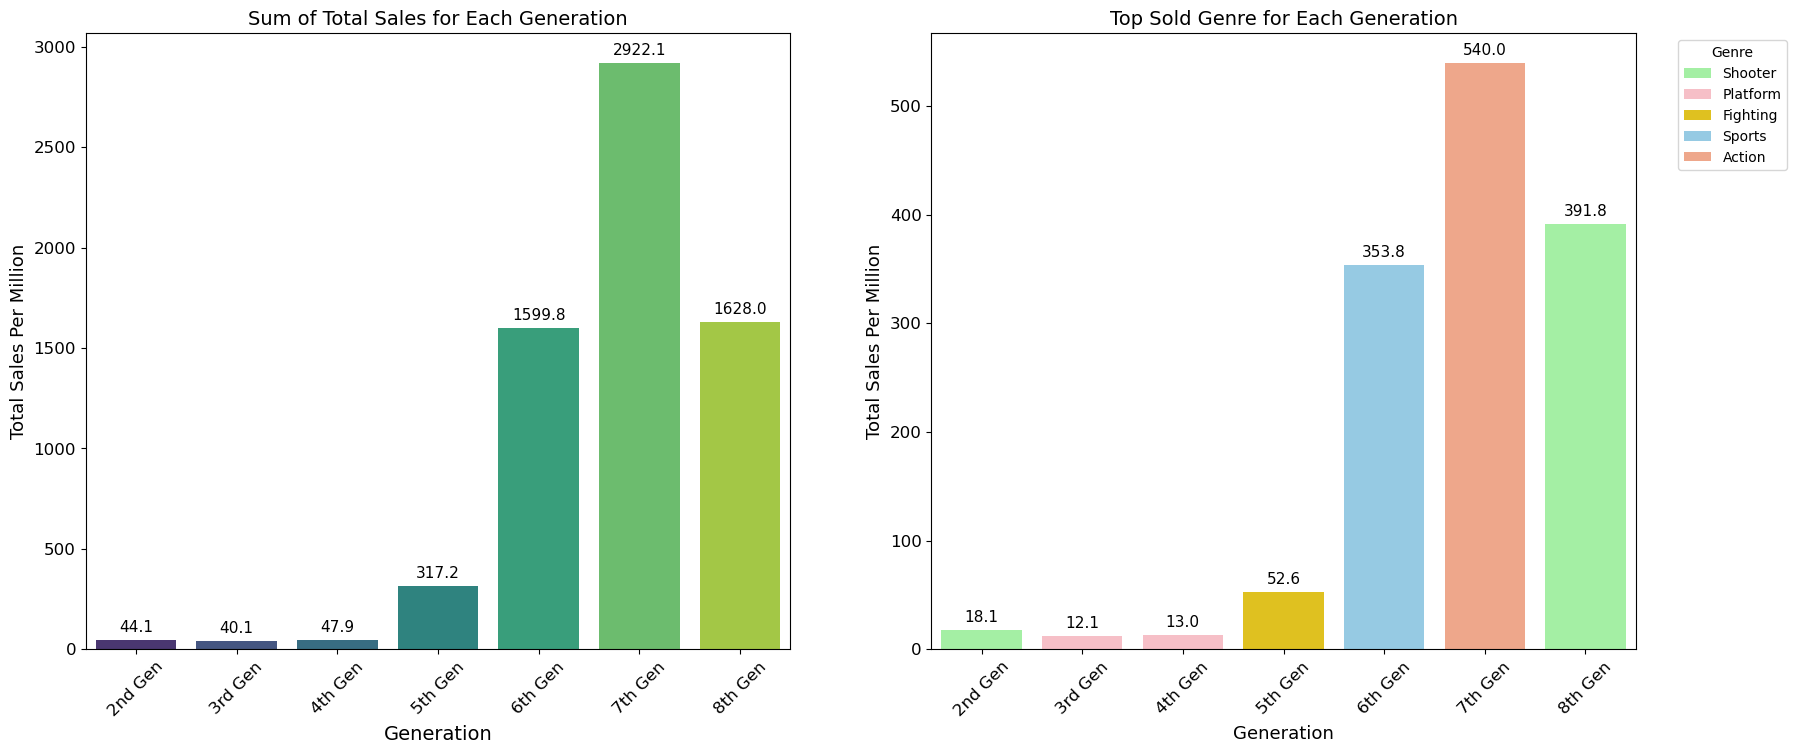

In [55]:
#Grouping 'generation' and creating a sum of 'total_sales'
generation_sales = df.groupby('generation')['total_sales'].sum().reset_index();

#Dropping any NaN values and grouping and creating a sum in 'total_sales' for 'generation' + 'genre'
filter_gen = df[['generation', 'genre', 'total_sales']].dropna()
grouped_filter_gen = filter_gen.groupby(['generation', 'genre'])['total_sales'].sum().reset_index()

#Locating the row with the top genres for each generation
top_gen_genres = grouped_filter_gen.loc[grouped_filter_gen.groupby('generation')['total_sales'].idxmax()].reset_index()

#Creating subplots and displaying graphs
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#Creating barplots whilst adding sales data labels above bars for easier reading
ax1 = sns.barplot(data=generation_sales, x='generation', y='total_sales', palette='viridis', ax=axes[0]);
ax1.set_title('Sum of Total Sales for Each Generation', fontsize=14,);
ax1.set_xlabel('Generation', fontsize=14);
ax1.set_ylabel('Total Sales Per Million', fontsize=13);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12);
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.1f'),
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points', fontsize=11)

ax2 =sns.barplot(data=top_gen_genres, x='generation', y='total_sales', hue='genre', dodge=False, palette=genre_colours, ax=axes[1])
ax2.set_title('Top Sold Genre for Each Generation', fontsize=14)
ax2.set_xlabel('Generation', fontsize=13)
ax2.set_ylabel('Total Sales Per Million', fontsize=13)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=12)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.1f'),
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points', fontsize=11)


## The Video Game Crash of 1983
### The crash was due to factors such as oversaturation of titles and consoles, as well as a flood of low quality games. One stood out and has been blamed on the crash itself... the release of E.T.: The Extra Terrestrial
### The recovery of the video game crash was pointed to be at the new Nintendo Entertainment System (NES) in 1985

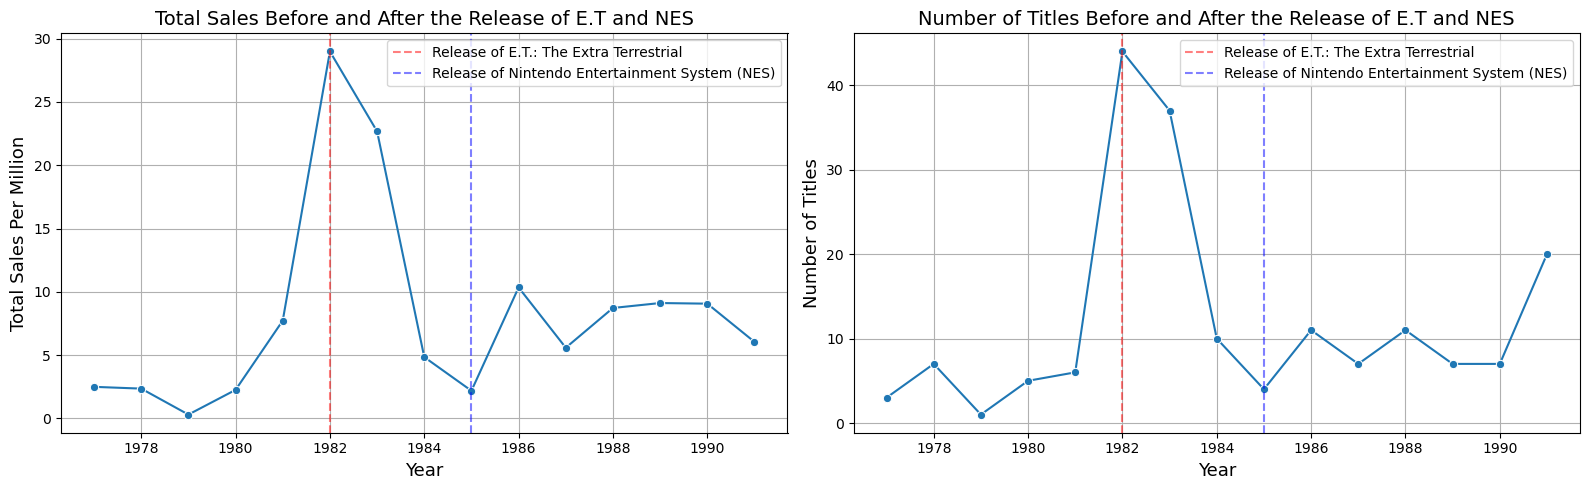

In [14]:
#Creating the time boundaries for my data
et_start_date = pd.to_datetime('1977-01-01')
et_end_date = pd.to_datetime('1992-01-01')
et_start_end = df[(df['release_date'] >= et_start_date) & (df['release_date'] < et_end_date)]

#Filtering by year and summing 'total_sales' + count 'titles'
et_start_end['year'] = et_start_end['release_date'].dt.year
et_year_sales = et_start_end.groupby('year')['total_sales'].sum().reset_index()
et_year_titles = et_start_end.groupby('year')['title'].count().reset_index()

#Plotting and adding axis lines to display release timings
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(data=et_year_sales, x='year', y='total_sales', marker='o', ax=axes[0]);
axes[0].axvline(x=1982, color='red', linestyle='--', label='Release of E.T.: The Extra Terrestrial', alpha=0.5);
axes[0].axvline(x=1985, color='blue', linestyle='--', label='Release of Nintendo Entertainment System (NES)', alpha=0.5);
axes[0].set_title('Total Sales Before and After the Release of E.T and NES', fontsize=14);
axes[0].set_xlabel('Year', fontsize=13);
axes[0].set_ylabel('Total Sales Per Million', fontsize=13);
axes[0].grid(True)
axes[0].legend();

sns.lineplot(data=et_year_titles, x='year', y='title', marker='o', ax=axes[1]);
axes[1].axvline(x=1982, color='red', linestyle='--', label='Release of E.T.: The Extra Terrestrial', alpha=0.5);
axes[1].axvline(x=1985, color='blue', linestyle='--', label='Release of Nintendo Entertainment System (NES)', alpha=0.5);
axes[1].set_title('Number of Titles Before and After the Release of E.T and NES', fontsize=14);
axes[1].set_xlabel('Year', fontsize=13);
axes[1].set_ylabel('Number of Titles', fontsize=13);
axes[1].grid(True)
axes[1].legend();
plt.tight_layout()

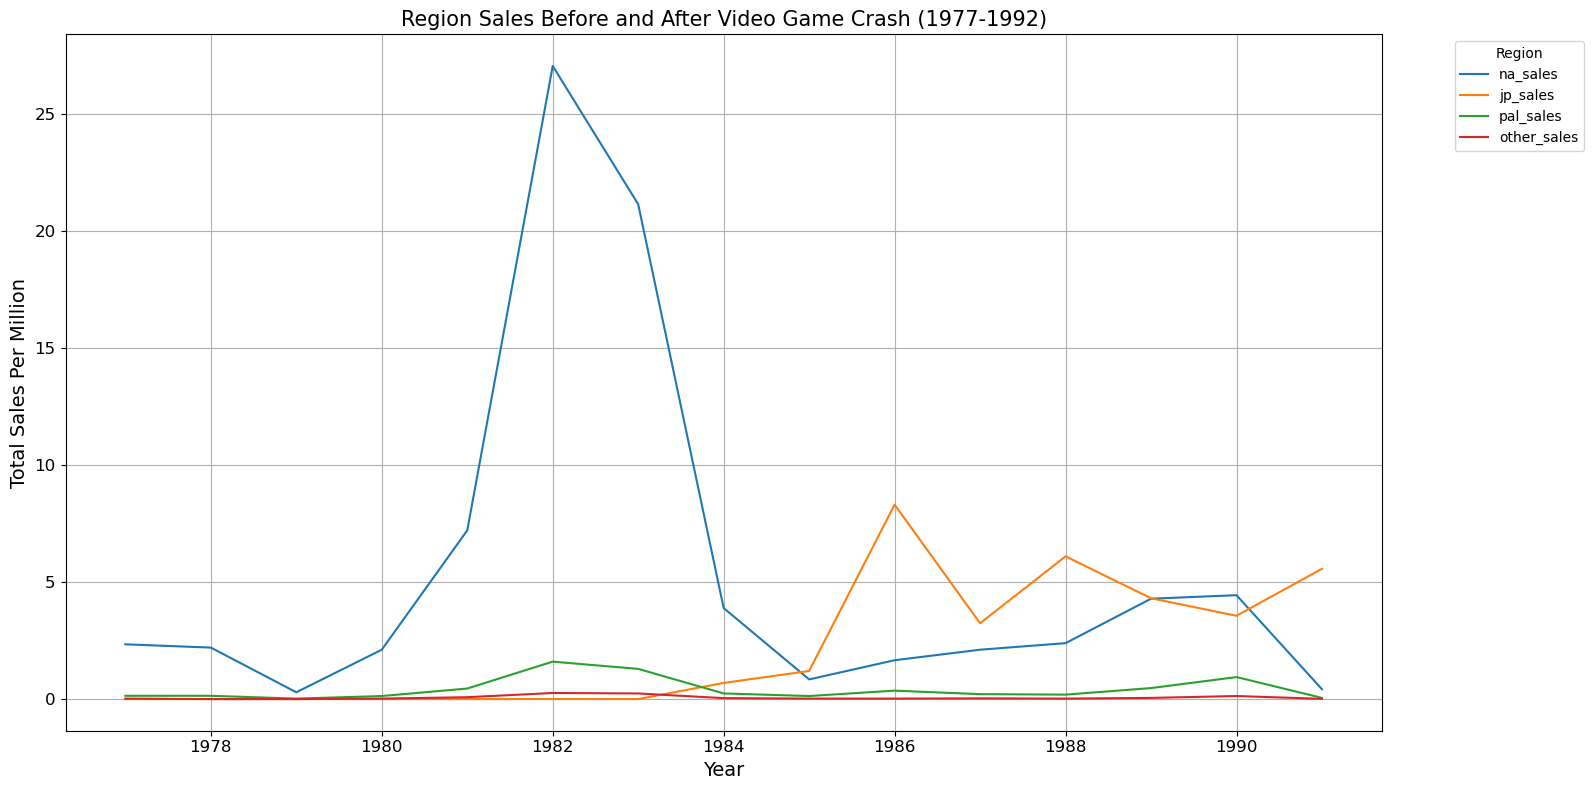

In [88]:
#Seperating the et_start_end by year and summing the regions' sales 
sales_by_region = et_start_end.groupby(et_start_end['release_date'].dt.year)[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().reset_index()

# Melt the region sales for multiple line plot
melted_region_sales = sales_by_region.melt(id_vars='release_date', var_name='region', value_name='sales')

# Creating the multiple line plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=melted_region_sales, x='release_date', y='sales', hue='region')
plt.title('Region Sales Before and After Video Game Crash (1977-1992)', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales Per Million', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()